<a href="https://colab.research.google.com/gist/ShauryaSrivastava2810/67fd1ea0395ced74c40413d7df0a13cf/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("AirQualityUCI.csv")

# Display the first 1000 rows
first_1000_rows = df.head(1000)
print(first_1000_rows)



     CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0       2.6         1360       150      11.9           1046      166   
1       2.0         1292       112       9.4            955      103   
2       2.2         1402        88       9.0            939      131   
3       2.2         1376        80       9.2            948      172   
4       1.6         1272        51       6.5            836      131   
..      ...          ...       ...       ...            ...      ...   
995  -200.0          871      -200       3.7            694     -200   
996  -200.0         1035      -200       8.7            929     -200   
997  -200.0         1513      -200      27.0           1480     -200   
998  -200.0         1726      -200      40.3           1776     -200   
999  -200.0         1396      -200      20.0           1296     -200   

     PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0            1056      113          1692         1268  13.6

Epoch 1/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6252 - val_loss: 0.0651
Epoch 2/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0488 - val_loss: 0.0301
Epoch 3/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0259 - val_loss: 0.0210
Epoch 4/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0183 - val_loss: 0.0168
Epoch 5/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0151 - val_loss: 0.0130
Epoch 6/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0119 - val_loss: 0.0101
Epoch 7/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0093 - val_loss: 0.0073
Epoch 8/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0068 - val_loss: 0.0055
Epoch 9/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0056 - val_loss: 0.0044
Epoch 10/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0048 - val_loss: 0.0043
Epoch 11/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0044 - val_loss: 0.0040
Epoch 12/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

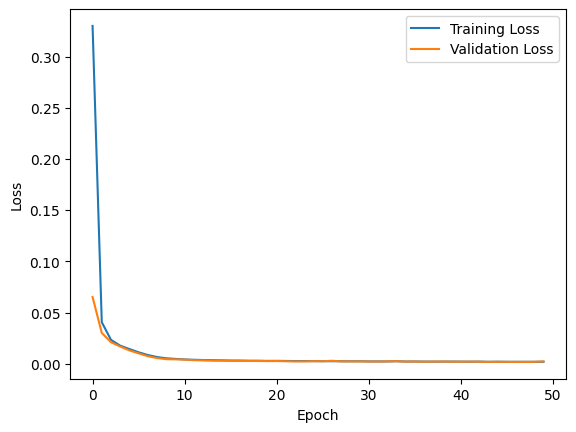

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv("AirQualityUCI.csv")

# Replace non-numeric values with NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Handle missing values (replace with median)
df.fillna(df.median(), inplace=True)

# Normalize the features using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Split the dataset into training, validation, and testing sets (80-10-10 split)
train_data, test_data = train_test_split(df_scaled, test_size=0.2, random_state=42)
test_data, val_data = train_test_split(test_data, test_size=0.5, random_state=42)

# Step 3: Define autoencoder architecture
input_shape = train_data.shape[1]
encoding_dim = 8  # Adjust based on the complexity of the dataset

input_data = Input(shape=(input_shape,))
encoded = Dense(64, activation='relu')(input_data)
encoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(input_shape, activation='linear')(decoded)

autoencoder = Model(input_data, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Step 4: Train the autoencoder model
history = autoencoder.fit(train_data, train_data,
                          epochs=50,
                          batch_size=32,
                          shuffle=True,
                          validation_data=(val_data, val_data))

# Step 5: Monitor the training progress
# Print the training and validation loss
print("Training Loss:", history.history['loss'])
print("Validation Loss:", history.history['val_loss'])

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [3]:
import numpy as np

# Predict reconstruction error for each data point
train_reconstructions = autoencoder.predict(train_data)
train_mse = np.mean(np.square(train_data - train_reconstructions), axis=1)

# Calculate mean and standard deviation of the training reconstruction errors
mse_mean = np.mean(train_mse)
mse_std = np.std(train_mse)

# Define threshold for anomaly detection
threshold = mse_mean + 3 * mse_std  # Adjust the multiplier (e.g., 3) based on the desired sensitivity

# Detect anomalies in the test set
test_reconstructions = autoencoder.predict(test_data)
test_mse = np.mean(np.square(test_data - test_reconstructions), axis=1)
anomalies = test_data[test_mse > threshold]

# Print the number of anomalies detected
print("Number of anomalies detected:", len(anomalies))



234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Number of anomalies detected: 19


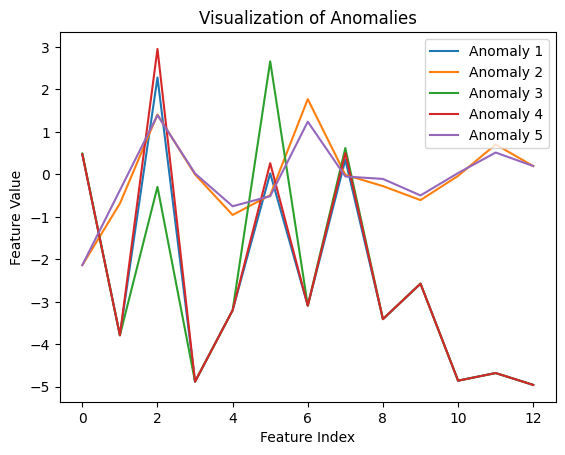

In [4]:
import matplotlib.pyplot as plt

# Visualize some of the anomalies
num_anomalies_to_visualize = min(len(anomalies), 5)  # Limit the number of anomalies to visualize
for i in range(num_anomalies_to_visualize):
    anomaly = anomalies[i]
    plt.plot(anomaly, label=f"Anomaly {i+1}")
plt.xlabel("Feature Index")
plt.ylabel("Feature Value")
plt.title("Visualization of Anomalies")
plt.legend()
plt.show()



In [5]:
from sklearn.metrics import confusion_matrix, classification_report

# Manually label a subset of anomalies for evaluation
# For demonstration purposes, we assume '1' as the label for anomalies and '0' for normal data points
y_true = np.zeros(len(test_data))  # Initialize all data points as normal (0)
anomaly_indices = np.where(test_mse > threshold)[0]  # Indices of anomalies in the test set
y_true[anomaly_indices] = 1  # Label anomalies as 1

# Predict anomaly labels based on the threshold
y_pred = np.zeros(len(test_data))
y_pred[test_mse > threshold] = 1  # Predict anomalies as 1 if MSE is above threshold

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate precision, recall, and F1-score
classification_rep = classification_report(y_true, y_pred)
print("\nClassification Report:")
print(classification_rep)



Confusion Matrix:
[[917   0]
 [  0  19]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       917
         1.0       1.00      1.00      1.00        19

    accuracy                           1.00       936
   macro avg       1.00      1.00      1.00       936
weighted avg       1.00      1.00      1.00       936

